In [52]:
import random as rd
import numpy as np

# random generation of filters
polarizationFilters = ["t", "x"]
draftKeySize = 20
binary = [0, 1]
draftKey = [rd.choice(binary) for i in range(draftKeySize)]
aliceFilters = [rd.choice(polarizationFilters) for j in range(draftKeySize)]
bobFilters = [rd.choice(polarizationFilters) for k in range(draftKeySize)]

print("Draft key: ", draftKey)
print("Alice's Filters: ", aliceFilters)
print("Bob's Filters: ", bobFilters)

Draft key:  [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
Alice's Filters:  ['t', 'x', 'x', 't', 'x', 't', 't', 'x', 't', 'x', 't', 't', 'x', 't', 'x', 'x', 'x', 't', 't', 'x']
Bob's Filters:  ['x', 'x', 't', 'x', 't', 't', 'x', 't', 't', 'x', 'x', 't', 'x', 't', 'x', 'x', 't', 'x', 't', 'x']


In [53]:
transmittion = []
aliceKey = []

def send(eve=False):

    for i in range(draftKeySize):
        if draftKey[i] == 1 and aliceFilters[i] == "t":
            if not eve:
                transmittion.append([0, 1])
                aliceKey.append(1)
            else:
                aliceKey.append(1)
                if rd.random() < 0.5:  # eve guesses incorrectly half the time
                    transmittion.append([1, 0])
                else:
                    transmittion.append([0, 1])
        elif draftKey[i] == 1 and aliceFilters[i] == "x":
            if not eve:
                transmittion.append([1, 1])
                aliceKey.append(1)
            else:
                aliceKey.append(1)
                if rd.random() < 0.5: # eve guesses incorrectly half the time
                    transmittion.append([0, 1])
                else:
                    transmittion.append([1, 1])
        elif draftKey[i] == 0 and aliceFilters[i] == "t":
            if not eve:
                transmittion.append([1, 0])
                aliceKey.append(0)
            else:
                aliceKey.append(0)
                if rd.random() < 0.5: # eve guesses incorrectly half the time
                    transmittion.append([0, 1]) 
                else:
                    transmittion.append([1, 0])
        elif draftKey[i] == 0 and aliceFilters[i] == "x":
            if not eve:
                transmittion.append([-1, 1])
                aliceKey.append(0)
            else:
                aliceKey.append(0)
                if rd.random() < 0.5: # eve guesses incorrectly half the time
                    transmittion.append([1, 0])
                else:
                    transmittion.append([-1, 1])

    print("Photons transmitted by polarization: ")
    print(transmittion)
    
send(True)

Photons transmitted by polarization: 
[[0, 1], [0, 1], [1, 1], [1, 0], [-1, 1], [0, 1], [1, 0], [-1, 1], [1, 0], [1, 1], [0, 1], [1, 0], [1, 1], [0, 1], [-1, 1], [1, 1], [1, 1], [0, 1], [1, 0], [0, 1]]


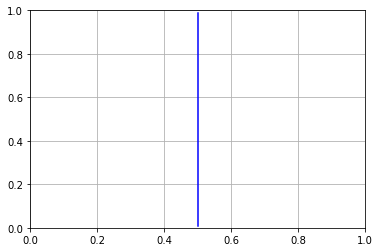

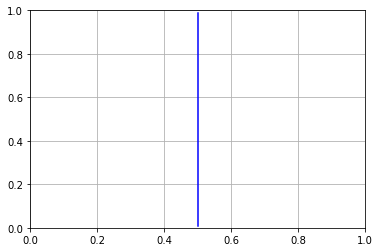

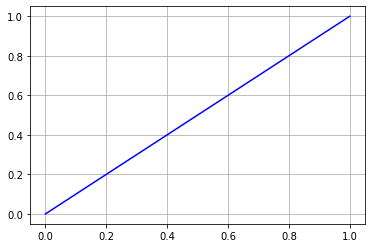

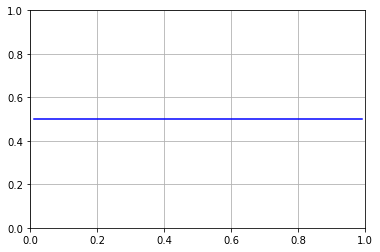

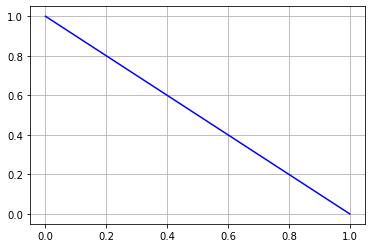

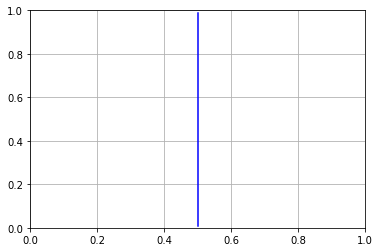

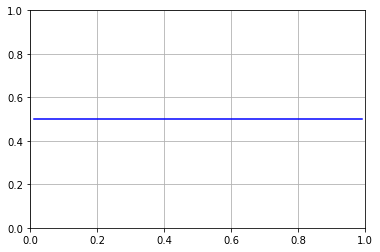

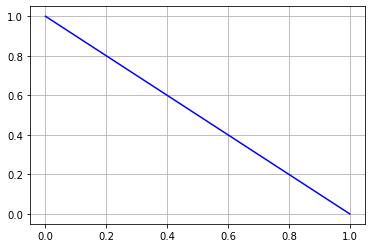

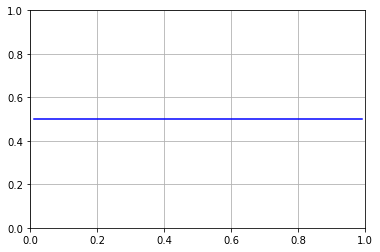

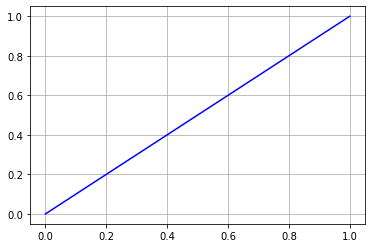

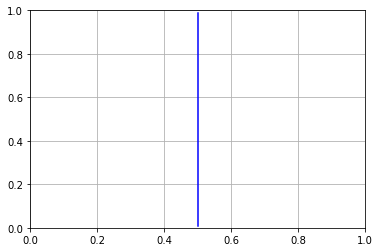

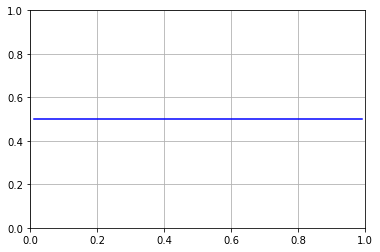

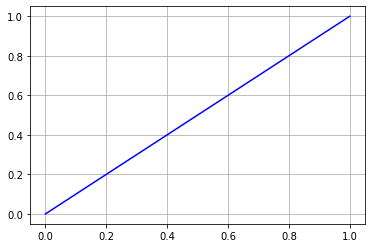

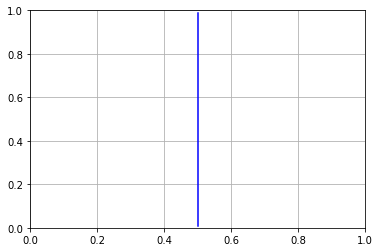

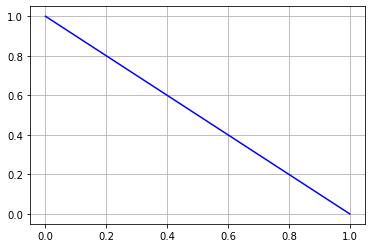

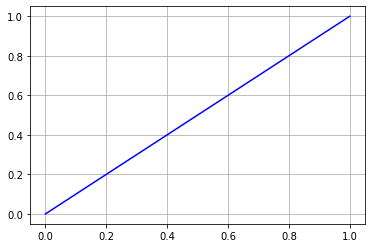

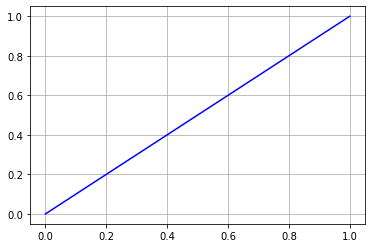

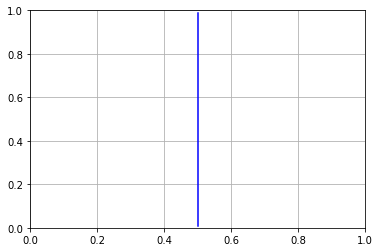

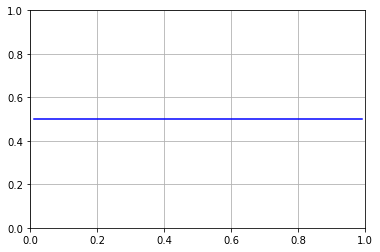

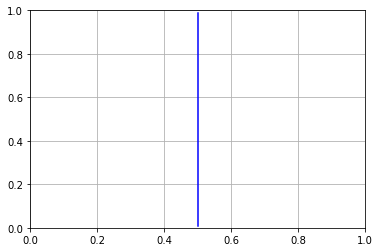

In [54]:
import matplotlib.pyplot as plt

# this is just to help visualization of the photon polarization
def displaySend():

    for i in range(draftKeySize):
        if transmittion[i] == [0,1]:
            plt.axvline(x=0.5, ymin=0.01, ymax=0.99, color='b')
            plt.grid()
            plt.show()
        elif transmittion[i] == [1,1]:
            x1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            y1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            plt.plot(x1, y1, color='b')
            plt.grid()
            plt.show()
        elif transmittion[i] == [1,0]:
            plt.axhline(y=0.5, xmin=0.01, xmax=0.99, color='b')
            plt.grid()
            plt.show()
        elif transmittion[i] == [-1,1]:
            x2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            y2 = list(reversed(x2))
            plt.plot(x2, y2, color='b')
            plt.grid()
            plt.show()

displaySend()

In [55]:
receivedKey = []

# bob will only keep the ones where he picks the correct filter
def receive():
    
    for i in range(draftKeySize):
        if transmittion[i] == [0,1] and bobFilters[i] == "t":
            receivedKey.append(1)
        elif transmittion[i] == [0,1] and bobFilters[i] == "x":
            receivedKey.append("DISCARD")
            aliceKey[i] = None
        elif transmittion[i] == [1,1] and bobFilters[i] == "t":
            receivedKey.append("DISCARD")
            aliceKey[i] = None
        elif transmittion[i] == [1,1] and bobFilters[i] == "x":
            receivedKey.append(1)
        elif transmittion[i] == [1,0] and bobFilters[i] == "t":
            receivedKey.append(0)
        elif transmittion[i] == [1,0] and bobFilters[i] == "x":
            receivedKey.append("DISCARD")
            aliceKey[i] = None
        elif transmittion[i] == [-1,1] and bobFilters[i] == "t":
            receivedKey.append("DISCARD")
            aliceKey[i] = None
        elif transmittion[i] == [-1,1] and bobFilters[i] == "x":
            receivedKey.append(0)
            
    indices_to_remove = [i for i in range(len(aliceKey)) if aliceKey[i] is None]
    for i in reversed(indices_to_remove):
        del aliceKey[i]
    
    print("Received Key: ")
    print(receivedKey)
    
receive()        

Received Key: 
['DISCARD', 'DISCARD', 'DISCARD', 'DISCARD', 'DISCARD', 1, 'DISCARD', 'DISCARD', 0, 1, 'DISCARD', 0, 1, 1, 0, 1, 'DISCARD', 'DISCARD', 0, 'DISCARD']


In [56]:
bobKey = []

def keyAgreement():

    for i in range(draftKeySize):
        if receivedKey[i] == 1 or receivedKey[i] == 0:
            bobKey.append(receivedKey[i])
            
    print("Bob key: ")
    print(bobKey)

keyAgreement()

print("Alice key: ")
print(aliceKey)

# check for eveasdropper by looking at a subset of the key
if aliceKey[0:10] != bobKey[0:10]:
    print('\n')
    print('\nEVEASDROPPER DETECTED!')

Bob key: 
[1, 0, 1, 0, 1, 1, 0, 1, 0]
Alice key: 
[1, 1, 1, 0, 1, 1, 0, 1, 0]



EVEASDROPPER DETECTED!


In [ ]:
# now try calling send() without the eveasdropper! 